In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# create list to hold cities
cities = []

#identify nearest city for each set of coordinates
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    
    # add unique cities to cities list
    if city not in cities:
        cities.append(city)
        
#print city count to confirm we have the right number
len(cities)

622

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | nicoya
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | aquiraz
Processing Record 5 of Set 1 | guerrero negro
Processing Record 6 of Set 1 | bukama
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | luderitz
Processing Record 9 of Set 1 | bathsheba
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | lublin
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | sosnovo-ozerskoye
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | rocha
Processing Record 16 of Set 1 | texarkana
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | kaitangata
Processing Record 20 of Set 1 | lagoa
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | tasiilaq
Processing Record 23 of Set 1 | meulaboh
Processing Record 24 of Set 1 | saint-joseph
Processi

Processing Record 40 of Set 4 | carolina
Processing Record 41 of Set 4 | shihezi
Processing Record 42 of Set 4 | san quintin
Processing Record 43 of Set 4 | khakhea
Processing Record 44 of Set 4 | higuey
City not found. Skipping...
Processing Record 45 of Set 4 | sao felix do xingu
Processing Record 46 of Set 4 | cheremshan
Processing Record 47 of Set 4 | beoumi
Processing Record 48 of Set 4 | esperance
Processing Record 49 of Set 4 | ponta delgada
Processing Record 50 of Set 4 | vincennes
Processing Record 1 of Set 5 | biak
Processing Record 2 of Set 5 | sibenik
Processing Record 3 of Set 5 | chuy
Processing Record 4 of Set 5 | lata
Processing Record 5 of Set 5 | vila velha
Processing Record 6 of Set 5 | anloga
Processing Record 7 of Set 5 | san cristobal
Processing Record 8 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 9 of Set 5 | suntar
Processing Record 10 of Set 5 | abu kamal
Processing Record 11 of Set 5 | rockland
Processing Record 12 of Set 5 | kiunga
Proce

Processing Record 25 of Set 8 | nguiu
City not found. Skipping...
Processing Record 26 of Set 8 | alta floresta
Processing Record 27 of Set 8 | otradnoye
Processing Record 28 of Set 8 | phan rang
City not found. Skipping...
Processing Record 29 of Set 8 | marcona
City not found. Skipping...
Processing Record 30 of Set 8 | touros
Processing Record 31 of Set 8 | kwekwe
Processing Record 32 of Set 8 | huron
Processing Record 33 of Set 8 | shimoda
Processing Record 34 of Set 8 | freising
Processing Record 35 of Set 8 | abiy adi
City not found. Skipping...
Processing Record 36 of Set 8 | khani
Processing Record 37 of Set 8 | villa carlos paz
Processing Record 38 of Set 8 | niquelandia
Processing Record 39 of Set 8 | ardakan
Processing Record 40 of Set 8 | miyako
Processing Record 41 of Set 8 | glace bay
Processing Record 42 of Set 8 | port lincoln
Processing Record 43 of Set 8 | west wendover
Processing Record 44 of Set 8 | burnie
Processing Record 45 of Set 8 | neuquen
Processing Record 46

Processing Record 12 of Set 12 | humaita
Processing Record 13 of Set 12 | lazaro cardenas
Processing Record 14 of Set 12 | okha
Processing Record 15 of Set 12 | miramar
Processing Record 16 of Set 12 | khalkhal
Processing Record 17 of Set 12 | gat
Processing Record 18 of Set 12 | mamboma
Processing Record 19 of Set 12 | carauari
Processing Record 20 of Set 12 | wajir
Processing Record 21 of Set 12 | belmonte
Processing Record 22 of Set 12 | manutuke
Processing Record 23 of Set 12 | port blair
Processing Record 24 of Set 12 | burica
City not found. Skipping...
Processing Record 25 of Set 12 | rawannawi
City not found. Skipping...
Processing Record 26 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 27 of Set 12 | wuan
Processing Record 28 of Set 12 | havre-saint-pierre
Processing Record 29 of Set 12 | nushki
Processing Record 30 of Set 12 | isla vista
Processing Record 31 of Set 12 | devonport
Processing Record 32 of Set 12 | inhambane
Processing Record 33 of Set 1

In [30]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nicoya,10.1483,-85.4520,89.15,33,83,8.14,CR,2022-02-18 17:41:51
1,Mataura,-46.1927,168.8643,53.47,99,100,3.29,NZ,2022-02-18 17:41:52
2,Busselton,-33.6500,115.3333,67.08,50,0,7.11,AU,2022-02-18 17:41:53
3,Aquiraz,-3.9014,-38.3911,87.89,65,100,9.10,BR,2022-02-18 17:41:53
4,Guerrero Negro,27.9769,-114.0611,66.25,28,0,2.33,MX,2022-02-18 17:41:55
5,Bukama,-9.2000,25.8500,69.76,96,100,2.33,CD,2022-02-18 17:41:56
6,Vaini,-21.2000,-175.2000,73.56,100,40,3.44,TO,2022-02-18 17:41:57
7,Luderitz,-26.6481,15.1594,70.63,70,5,12.57,NA,2022-02-18 17:41:58
8,Bathsheba,13.2167,-59.5167,86.61,58,40,20.71,BB,2022-02-18 17:42:00
9,Punta Arenas,-53.1500,-70.9167,50.02,81,75,12.66,CL,2022-02-18 17:41:30


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nicoya,CR,2022-02-18 17:41:51,10.1483,-85.4520,89.15,33,83,8.14
1,Mataura,NZ,2022-02-18 17:41:52,-46.1927,168.8643,53.47,99,100,3.29
2,Busselton,AU,2022-02-18 17:41:53,-33.6500,115.3333,67.08,50,0,7.11
3,Aquiraz,BR,2022-02-18 17:41:53,-3.9014,-38.3911,87.89,65,100,9.10
4,Guerrero Negro,MX,2022-02-18 17:41:55,27.9769,-114.0611,66.25,28,0,2.33
...,...,...,...,...,...,...,...,...,...
558,Ostersund,SE,2022-02-18 18:05:59,63.1792,14.6357,21.65,100,0,4.61
559,Voh,NC,2022-02-18 18:06:00,-20.9667,164.7000,76.10,91,93,3.09
560,Kosino,RU,2022-02-18 18:06:01,58.4127,51.2782,28.58,92,100,17.76
561,Gaomi,CN,2022-02-18 18:06:02,36.3833,119.7528,31.10,56,100,7.00


In [10]:
# create output csv file
output_data_file = "Weather_Data/cities.csv"
# export to csv
city_data_df.to_csv(output_data_file, index_label="city_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [12]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1645207566.946855

In [13]:
today = time.strftime("%x")
today

'02/18/22'

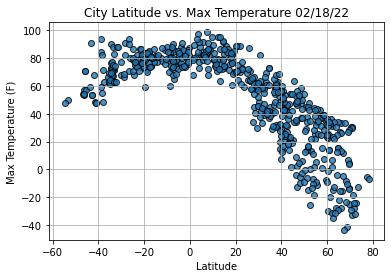

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

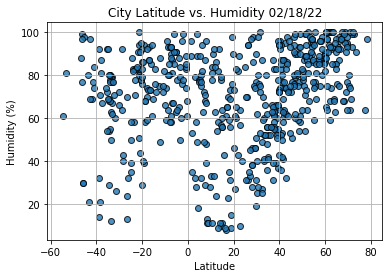

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

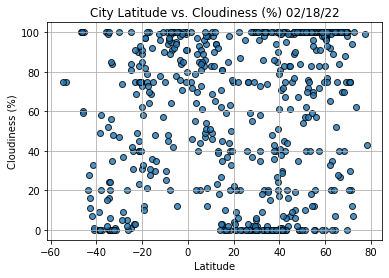

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

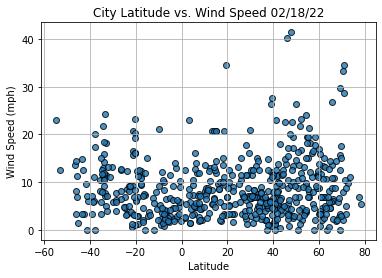

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [19]:
index13 = city_data_df.loc[13]
index13

City                    Upernavik
Country                        GL
Date          2022-02-18 17:42:04
Lat                       72.7868
Lng                      -56.1549
Max Temp                   -24.02
Humidity                       99
Cloudiness                    100
Wind Speed                   9.82
Name: 13, dtype: object

In [20]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nicoya,CR,2022-02-18 17:41:51,10.1483,-85.4520,89.15,33,83,8.14
4,Guerrero Negro,MX,2022-02-18 17:41:55,27.9769,-114.0611,66.25,28,0,2.33
8,Bathsheba,BB,2022-02-18 17:42:00,13.2167,-59.5167,86.61,58,40,20.71
10,Lublin,PL,2022-02-18 17:41:11,51.0000,23.0000,37.38,71,57,8.77
11,Butaritari,KI,2022-02-18 17:42:03,3.0707,172.7902,81.03,79,55,22.95
...,...,...,...,...,...,...,...,...,...
557,Brookhaven,US,2022-02-18 18:05:58,31.5791,-90.4407,43.75,53,58,8.46
558,Ostersund,SE,2022-02-18 18:05:59,63.1792,14.6357,21.65,100,0,4.61
560,Kosino,RU,2022-02-18 18:06:01,58.4127,51.2782,28.58,92,100,17.76
561,Gaomi,CN,2022-02-18 18:06:02,36.3833,119.7528,31.10,56,100,7.00


In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nicoya,CR,2022-02-18 17:41:51,10.1483,-85.4520,89.15,33,83,8.14
4,Guerrero Negro,MX,2022-02-18 17:41:55,27.9769,-114.0611,66.25,28,0,2.33
8,Bathsheba,BB,2022-02-18 17:42:00,13.2167,-59.5167,86.61,58,40,20.71
10,Lublin,PL,2022-02-18 17:41:11,51.0000,23.0000,37.38,71,57,8.77
11,Butaritari,KI,2022-02-18 17:42:03,3.0707,172.7902,81.03,79,55,22.95


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

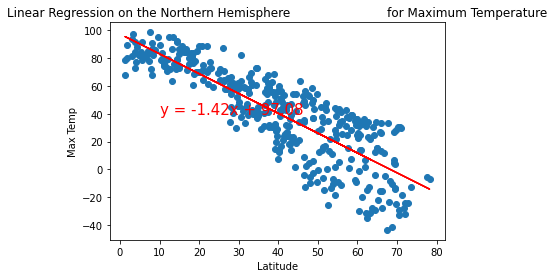

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

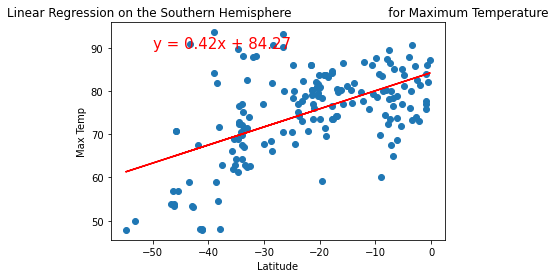

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

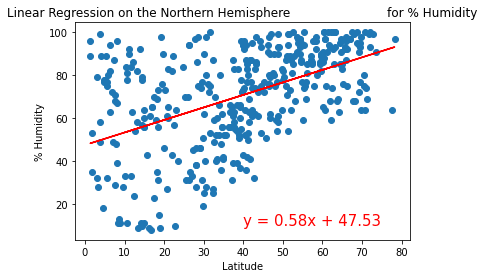

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

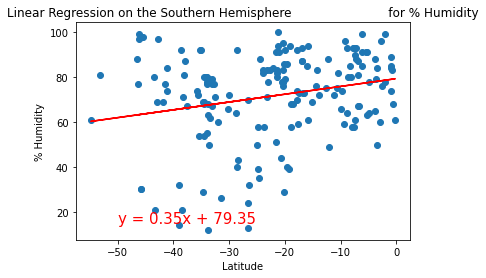

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

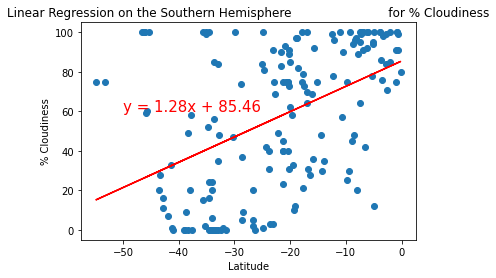

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

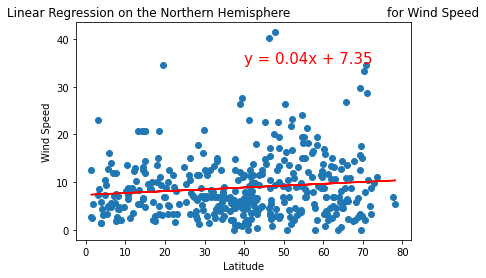

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

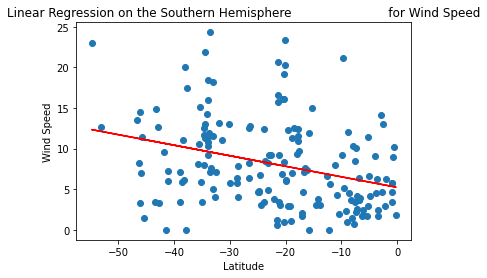

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))